# <center> PyTorch From the Ground Up





<center> [L. Antiga](http://twitter.com/lantiga), [D. Ciriello](http://twitter.com/dnlcrl) and [A. Paszke](http://twitter.com/apaszke)

<center> [PyCon Nove (2018)](https://pycon.it/).

## Before getting started

Python3 is required to run this tutorial. You also will need some libraries from SciPy package (NumPy, Matplotlib, Pandas), Jupyter Notebook support, and Pytorch 0.3.0 or newer.

- create (a folder and once cd'ed it) an environtment for this training:

    mkdir pycon9-pytorch
    cd pycon9-pytorch
    
#### non-Conda

    python3 -m venv pycon9-pytorch-env
    source pycon9-pytorch-env/bin/activate
    
#### Conda

    conda create --name pycon9-pytorch-env
    source activate pycon9-pytorch-env  
    (for windows: activate myenv)
  

# Setup

- to run jupyter notebooks:

    python3 -m pip install jupyter
   

- to run pytorch examples (torchnet and scikit-learn not essentials):


    python3 -m pip install torch torchvision torchnet
    python3 -m pip install numpy matplotlib PIL
    
@Conda users: replace `python3 -m pip` with `conda`
    

Before gettting started, we suggest you to start installing pytorch, some necessary packages and the needed data to use with the code we will run, so while we talk during this little presentation, is highly suggested that you run those lines in your terminal and install all needed packages for later.

# Download Data for the Trainig

During these hours we will make use of some light dataset, if you don't download the data now it, theoretically it will be downloaded automatically later, but if you want to download the data in advance you can use one of the following links:

- https://bit.ly/2qstREA (DropBox)
- https://bit.ly/2EI4NOY (GDrive, and it's an upper i)
- https://bit.ly/2vdLLAF (iCloud)
- https://goo.gl/uHm37T (OneDrive)

you should get a `data.zip` archive (380MB), unzip it and put the unzipped `data` directory in your `pycon9-pytorch` folder.

You should then be ready for the training

while the packages installation is pretty propedeutics, you can skip the data downloading step, but still is highly suggested that you start to download the data because nobody knows what could happens later, if you want to, we also have some usb stick with the data in it, so let us know if you have problems.

Windows warning: we prepared this training on a Unix machine and we are pretty cinfident it will work also on Lunix, but we haven't tested it on a windows machine, so, again, let us know if you have problems and we will try to fix it togheter (or you can simply fix it by yourself or avoid using a window machine ;P)

This trainning shows you how to train a deep neural network using [PyTorch](http://pytorch.org/). PyTorch is a Python package aimed at accelerating deep learning applications, building on the [Torch](http://torch.ch/) library. PyTorch provides a [Numpy](http://www.numpy.org/)-like abstraction for representing _tensors_, or multiway arrays, and it can take advantage of [GPUs](http://www.nvidia.com/object/what-is-gpu-computing.html) for performance. The tutorial ends with some case study, which is how to use PyTorch for performing classification tasks and some other intresting things.

> Besides PyTorch, there are numerous proposed tools and extensions to get GPU acceleration for multiway arrays. See **Suggested Next Steps** at the end of this tutorial for pointers.

**Knowledge prerequisites.** This tutorial assumes familiarity with Python and Numpy, for starters.

In [1]:
import numpy as np
%matplotlib inline

From there, PyTorch makes it easy to get started with deep learning even if your background in the topic is modest. At a minimum, it's helpful to know that a multilayer neural network model may be viewed as a graph of nodes (values and functions on values) connected by weights (the unknown parameters of the model), where one wishes to estimate the weights from data using an optimization procedure (think: gradient computations!) based on forward and backward propagation.

**Software prerequisites.** You'll need to install PyTorch before running this notebook. Here's a code cell to verify that you are ready to go.

In [2]:
import torch

**Hardware niceties.** Lastly, to exploit GPUs, you'll need an NVIDIA GPU with the CUDA SDK installed. It is reported that 10-100$\times$ speedups are possible by doing so. Of course, if you don't have such a setup, PyTorch still can run using the CPU only. But remember, when it comes to training neural network models, life is short---so you should use GPUs if you can!

## **Presentation Outline.**

### 1. Essential PyTorch Background
### 2. Training Machines with PyTorch
### 3. Real World Applications
### 4. Training with PyTorch Basics
### 5. Examples Hands-on



### **1. Essential PyTorch Background**

#### 1.1 PyTorch, Torch, Numpy
#### 1.2 Tensors
#### 1.3 Tensors VS Numpy
#### 1.4 Variables
#### 1.5 Computation Graph
#### 1.6 Backpropagation with PyTorch
#### 1.7 Cuda Interface

## 1. Essential PyTorch background

* PyTorch is a Python package aimed at accelerating deep learning applications, building on the [Torch](http://torch.ch/) library. 
* PyTorch provides a [Numpy](http://www.numpy.org/)-like abstraction for representing _tensors_, or multiway arrays, and it can take advantage of [GPUs](http://www.nvidia.com/object/what-is-gpu-computing.html) for performance.

<img src="images/tensor.png" style="max-width:100%; width: 75%; max-width: none"/>

## 1.1 PyTorch, Torch, Numpy

pytorch comes from its predecessor Lua torch, written coincidentally in Lua. Which aimed to be a xxx with anologues function to numpy and its core written in C, etc. Why Python instead of lua and why numpy as top aims

## 1.2 PyTorch Tensors

The key data abstraction of PyTorch is a tensor, which is a multidimensional array. It is similar in functionality to Numpy's `ndarray` object. Use [torch.Tensor()](http://pytorch.org/docs/master/tensors.html) to create one.

In [3]:
# Generate a 2-D pytorch tensor (i.e., a matrix)
pytorch_tensor = torch.Tensor(10, 20)
print("type: ", type(pytorch_tensor), " and size: ", pytorch_tensor.shape )

('type: ', <class 'torch.FloatTensor'>, ' and size: ', torch.Size([10, 20]))


If you need a Numpy-compatible representation, or if you want to create a PyTorch tensor from an existing Numpy object, it's easy to do.

In [4]:
# Convert the pytorch tensor to a numpy array:
numpy_tensor = pytorch_tensor.numpy()
print("type: ", type(numpy_tensor), " and size: ", numpy_tensor.shape)

# Convert the numpy array to Pytorch Tensor:
print("type: ", type(torch.Tensor(numpy_tensor)), " and size: ", torch.Tensor(numpy_tensor).shape)

('type: ', <type 'numpy.ndarray'>, ' and size: ', (10, 20))
('type: ', <class 'torch.FloatTensor'>, ' and size: ', torch.Size([10, 20]))


## 1.3 PyTorch vs. NumPy

PyTorch is not a drop in replacement for NumPy, but it implements a lot of Numpy functionality. One inconvenience is it's naming scheme that sometimes is rather different from Numpy. Let's go over several examples to see the difference. Let's look at PyTorch and NumPy differences on various examples:

#### 1. Tensor creation

In [5]:
t = torch.rand(2, 4, 3, 5)
a = np.random.rand(2, 4, 3, 5)

In [6]:
print('Random Tensor with size (3, 4):\n', torch.rand(3, 4))
print("Random NdArray with size (3, 4):\n", np.random.rand(3, 4))
print('-------------------------------------------------------------------------')

('Random Tensor with size (3, 4):\n', 
 0.4754  0.6463  0.1006  0.7674
 0.3172  0.9662  0.9730  0.6362
 0.1474  0.5803  0.0878  0.7704
[torch.FloatTensor of size 3x4]
)
('Random NdArray with size (3, 4):\n', array([[0.09740168, 0.95940133, 0.55691188, 0.71650853],
       [0.8625846 , 0.58623005, 0.0765706 , 0.79093742],
       [0.87391937, 0.56765921, 0.90997674, 0.660596  ]]))
-------------------------------------------------------------------------


You can see other initializations schemes like zeros, ones, and identity matrices below.

In [7]:
print('Tensor of zeros with size (3, 4):\n', torch.zeros(3, 4))
print('NdArray of zeros with size (3, 4):\n', np.zeros((3, 4)))
print('-------------------------------------------------------------------------')

print('Tensor of ones with size (3, 4):\n', torch.ones(3, 4))
print('NdArray of ones with size (3, 4):\n', np.ones((3, 4)))
print('-------------------------------------------------------------------------')

print('Identity Tensor with size (3, 4):\n', torch.eye(3, 4))
print("Identity NdArray with size (3, 3) (can't create non-squared identity matrix):\n", np.eye(3))
print('-------------------------------------------------------------------------')

('Tensor of zeros with size (3, 4):\n', 
 0  0  0  0
 0  0  0  0
 0  0  0  0
[torch.FloatTensor of size 3x4]
)
('NdArray of zeros with size (3, 4):\n', array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]))
-------------------------------------------------------------------------
('Tensor of ones with size (3, 4):\n', 
 1  1  1  1
 1  1  1  1
 1  1  1  1
[torch.FloatTensor of size 3x4]
)
('NdArray of ones with size (3, 4):\n', array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]]))
-------------------------------------------------------------------------
('Identity Tensor with size (3, 4):\n', 
 1  0  0  0
 0  1  0  0
 0  0  1  0
[torch.FloatTensor of size 3x4]
)
("Identity NdArray with size (3, 3) (can't create non-squared identity matrix):\n", array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]))
-------------------------------------------------------------------------


#### 2. Tensor slicing

In [8]:
t = torch.rand(2, 4, 3, 5)
a = t.numpy()

print ('Tensor:\n', t)
print ('NdArray:\n', a)
print ('-------------------------------------------------------------------------')

('Tensor:\n', 
(0 ,0 ,.,.) = 
  0.8927  0.8765  0.7227  0.6440  0.7628
  0.0991  0.2456  0.7453  0.4013  0.6193
  0.7082  0.9520  0.5097  0.6849  0.7736

(0 ,1 ,.,.) = 
  0.3453  0.1061  0.4539  0.8786  0.0756
  0.7806  0.5007  0.8466  0.6959  0.9096
  0.8843  0.6639  0.5449  0.6260  0.1390

(0 ,2 ,.,.) = 
  0.9275  0.9387  0.1271  0.0543  0.6793
  0.5550  0.1407  0.2807  0.7984  0.5488
  0.4926  0.2670  0.2426  0.7957  0.0591

(0 ,3 ,.,.) = 
  0.7766  0.0442  0.2634  0.6583  0.1431
  0.4807  0.7173  0.5568  0.1835  0.4006
  0.5180  0.0049  0.4900  0.3229  0.2752

(1 ,0 ,.,.) = 
  0.0122  0.8934  0.8601  0.7785  0.8321
  0.4978  0.1648  0.2380  0.8510  0.0251
  0.6932  0.5889  0.9295  0.7362  0.1310

(1 ,1 ,.,.) = 
  0.0548  0.9171  0.6205  0.2432  0.1620
  0.1167  0.4314  0.5757  0.7448  0.8041
  0.4937  0.7730  0.1111  0.7027  0.6935

(1 ,2 ,.,.) = 
  0.6581  0.3094  0.5197  0.8278  0.9137
  0.8487  0.8076  0.6080  0.6044  0.3242
  0.8910  0.8151  0.9536  0.2894  0.3920

(1 ,3 ,.,.) 

In [9]:
pytorch_slice = t[0, 1:3, :, 4]
numpy_slice =  a[0, 1:3, :, 4]

In [10]:
print ('Tensor[0, 1:3, :, 4]:\n', pytorch_slice)
print ('NdArray[0, 1:3, :, 4]:\n', numpy_slice)
print ('-------------------------------------------------------------------------')

('Tensor[0, 1:3, :, 4]:\n', 
 0.0756  0.9096  0.1390
 0.6793  0.5488  0.0591
[torch.FloatTensor of size 2x3]
)
('NdArray[0, 1:3, :, 4]:\n', array([[0.07564211, 0.90960705, 0.1390332 ],
       [0.6793212 , 0.54875016, 0.05909902]], dtype=float32))
-------------------------------------------------------------------------


Below you can find more slicing examples.

In [11]:
print ('Tensor size:\n', t.size())
print ('NdArray size:\n', a.shape)
print ('-------------------------------------------------------------------------')

print ('Tensor[0][1][2][3]:\n', t[0][1][2][3])
print ('NdArray[0][1][2][3]:\n', a[0][1][2][3])
print ('-------------------------------------------------------------------------')

print ('Tensor[0, 1, 2, 3]:\n', t[0, 1, 2, 3])
print ('NdArray[0, 1, 2, 3]:\n', a[0, 1, 2, 3])
print ('-------------------------------------------------------------------------')

print ('Tensor[0][1]:\n', t[0][1])
print ('NdArray[0][1]:\n', a[0][1])
print ('-------------------------------------------------------------------------')

print ('Tensor[0, 1:3]:\n', t[0, 1:3])
print ('NdArray[0, 1:3]:\n', a[0, 1:3])
print ('-------------------------------------------------------------------------')

('Tensor size:\n', torch.Size([2, 4, 3, 5]))
('NdArray size:\n', (2, 4, 3, 5))
-------------------------------------------------------------------------
('Tensor[0][1][2][3]:\n', 0.6259750723838806)
('NdArray[0][1][2][3]:\n', 0.6259751)
-------------------------------------------------------------------------
('Tensor[0, 1, 2, 3]:\n', 0.6259750723838806)
('NdArray[0, 1, 2, 3]:\n', 0.6259751)
-------------------------------------------------------------------------
('Tensor[0][1]:\n', 
 0.3453  0.1061  0.4539  0.8786  0.0756
 0.7806  0.5007  0.8466  0.6959  0.9096
 0.8843  0.6639  0.5449  0.6260  0.1390
[torch.FloatTensor of size 3x5]
)
('NdArray[0][1]:\n', array([[0.34531552, 0.10614556, 0.4539129 , 0.8786139 , 0.07564211],
       [0.78062874, 0.50066245, 0.84664124, 0.6958588 , 0.90960705],
       [0.88425106, 0.6639061 , 0.54486346, 0.6259751 , 0.1390332 ]],
      dtype=float32))
-------------------------------------------------------------------------
('Tensor[0, 1:3]:\n', 
(0 ,.,.)

#### 3. Tensor masking

In [12]:
t = t - 0.5
a = t.numpy()

print ('Tensor:\n', t)
print ('NdArray:\n', a)
print ('-------------------------------------------------------------------------')

('Tensor:\n', 
(0 ,0 ,.,.) = 
  0.3927  0.3765  0.2227  0.1440  0.2628
 -0.4009 -0.2544  0.2453 -0.0987  0.1193
  0.2082  0.4520  0.0097  0.1849  0.2736

(0 ,1 ,.,.) = 
 -0.1547 -0.3939 -0.0461  0.3786 -0.4244
  0.2806  0.0007  0.3466  0.1959  0.4096
  0.3843  0.1639  0.0449  0.1260 -0.3610

(0 ,2 ,.,.) = 
  0.4275  0.4387 -0.3729 -0.4457  0.1793
  0.0550 -0.3593 -0.2193  0.2984  0.0488
 -0.0074 -0.2330 -0.2574  0.2957 -0.4409

(0 ,3 ,.,.) = 
  0.2766 -0.4558 -0.2366  0.1583 -0.3569
 -0.0193  0.2173  0.0568 -0.3165 -0.0994
  0.0180 -0.4951 -0.0100 -0.1771 -0.2248

(1 ,0 ,.,.) = 
 -0.4878  0.3934  0.3601  0.2785  0.3321
 -0.0022 -0.3352 -0.2620  0.3510 -0.4749
  0.1932  0.0889  0.4295  0.2362 -0.3690

(1 ,1 ,.,.) = 
 -0.4452  0.4171  0.1205 -0.2568 -0.3380
 -0.3833 -0.0686  0.0757  0.2448  0.3041
 -0.0063  0.2730 -0.3889  0.2027  0.1935

(1 ,2 ,.,.) = 
  0.1581 -0.1906  0.0197  0.3278  0.4137
  0.3487  0.3076  0.1080  0.1044 -0.1758
  0.3910  0.3151  0.4536 -0.2106 -0.1080

(1 ,3 ,.,.) 

In [13]:
pytorch_masked = t[t > 0]
numpy_masked = a[a > 0]

In [14]:
print ('Tensor[Tensor > 0]:\n', pytorch_masked)
print ('NdArray[NdArray > 0]:\n', numpy_masked)
print ('-------------------------------------------------------------------------')

('Tensor[Tensor > 0]:\n', 
 0.3927
 0.3765
 0.2227
 0.1440
 0.2628
 0.2453
 0.1193
 0.2082
 0.4520
 0.0097
 0.1849
 0.2736
 0.3786
 0.2806
 0.0007
 0.3466
 0.1959
 0.4096
 0.3843
 0.1639
 0.0449
 0.1260
 0.4275
 0.4387
 0.1793
 0.0550
 0.2984
 0.0488
 0.2957
 0.2766
 0.1583
 0.2173
 0.0568
 0.0180
 0.3934
 0.3601
 0.2785
 0.3321
 0.3510
 0.1932
 0.0889
 0.4295
 0.2362
 0.4171
 0.1205
 0.0757
 0.2448
 0.3041
 0.2730
 0.2027
 0.1935
 0.1581
 0.0197
 0.3278
 0.4137
 0.3487
 0.3076
 0.1080
 0.1044
 0.3910
 0.3151
 0.4536
 0.2491
 0.4446
 0.2042
 0.2516
 0.4170
 0.4838
 0.1066
[torch.FloatTensor of size 69]
)
('NdArray[NdArray > 0]:\n', array([0.39269578, 0.3765368 , 0.2227357 , 0.14399421, 0.26276535,
       0.24529517, 0.11926764, 0.20815265, 0.45200998, 0.00972188,
       0.18491054, 0.27358502, 0.3786139 , 0.28062874, 0.00066245,
       0.34664124, 0.19585878, 0.40960705, 0.38425106, 0.1639061 ,
       0.04486346, 0.12597507, 0.42745674, 0.43873447, 0.17932123,
       0.05495274, 0.2983

Below you can see how conditioning works with PyTorch, and how array size is changed after that.

In [15]:
print ('Tensor > 0:\n', t > 0)
print ('NdArray > 0:\n', a > 0)
print ('-------------------------------------------------------------------------')

print ('Tensor[Tensor > 0]:\n', t[t > 0])
print ('NdArray[NdArray > 0]:\n', a[a > 0])
print ('-------------------------------------------------------------------------')

print ('Size of Tensor[Tensor > 0]:\n', t[t > 0].size())
print ('Size of NdArray[NdArray > 0]:\n', a[a > 0].shape)
print ('-------------------------------------------------------------------------')

('Tensor > 0:\n', 
(0 ,0 ,.,.) = 
  1  1  1  1  1
  0  0  1  0  1
  1  1  1  1  1

(0 ,1 ,.,.) = 
  0  0  0  1  0
  1  1  1  1  1
  1  1  1  1  0

(0 ,2 ,.,.) = 
  1  1  0  0  1
  1  0  0  1  1
  0  0  0  1  0

(0 ,3 ,.,.) = 
  1  0  0  1  0
  0  1  1  0  0
  1  0  0  0  0

(1 ,0 ,.,.) = 
  0  1  1  1  1
  0  0  0  1  0
  1  1  1  1  0

(1 ,1 ,.,.) = 
  0  1  1  0  0
  0  0  1  1  1
  0  1  0  1  1

(1 ,2 ,.,.) = 
  1  0  1  1  1
  1  1  1  1  0
  1  1  1  0  0

(1 ,3 ,.,.) = 
  1  0  0  1  0
  0  0  1  1  0
  0  1  0  1  1
[torch.ByteTensor of size 2x4x3x5]
)
('NdArray > 0:\n', array([[[[ True,  True,  True,  True,  True],
         [False, False,  True, False,  True],
         [ True,  True,  True,  True,  True]],

        [[False, False, False,  True, False],
         [ True,  True,  True,  True,  True],
         [ True,  True,  True,  True, False]],

        [[ True,  True, False, False,  True],
         [ True, False, False,  True,  True],
         [False, False, False,  True, Fals

#### 4. Tensor reshaping

In [16]:
print ('Tensor:\n', t)
print ('NdArray:\n', a)
print ('-------------------------------------------------------------------------')

('Tensor:\n', 
(0 ,0 ,.,.) = 
  0.3927  0.3765  0.2227  0.1440  0.2628
 -0.4009 -0.2544  0.2453 -0.0987  0.1193
  0.2082  0.4520  0.0097  0.1849  0.2736

(0 ,1 ,.,.) = 
 -0.1547 -0.3939 -0.0461  0.3786 -0.4244
  0.2806  0.0007  0.3466  0.1959  0.4096
  0.3843  0.1639  0.0449  0.1260 -0.3610

(0 ,2 ,.,.) = 
  0.4275  0.4387 -0.3729 -0.4457  0.1793
  0.0550 -0.3593 -0.2193  0.2984  0.0488
 -0.0074 -0.2330 -0.2574  0.2957 -0.4409

(0 ,3 ,.,.) = 
  0.2766 -0.4558 -0.2366  0.1583 -0.3569
 -0.0193  0.2173  0.0568 -0.3165 -0.0994
  0.0180 -0.4951 -0.0100 -0.1771 -0.2248

(1 ,0 ,.,.) = 
 -0.4878  0.3934  0.3601  0.2785  0.3321
 -0.0022 -0.3352 -0.2620  0.3510 -0.4749
  0.1932  0.0889  0.4295  0.2362 -0.3690

(1 ,1 ,.,.) = 
 -0.4452  0.4171  0.1205 -0.2568 -0.3380
 -0.3833 -0.0686  0.0757  0.2448  0.3041
 -0.0063  0.2730 -0.3889  0.2027  0.1935

(1 ,2 ,.,.) = 
  0.1581 -0.1906  0.0197  0.3278  0.4137
  0.3487  0.3076  0.1080  0.1044 -0.1758
  0.3910  0.3151  0.4536 -0.2106 -0.1080

(1 ,3 ,.,.) 

In [17]:
pytorch_reshape = t.view([6, 5, 4])
numpy_reshape = a.reshape([6, 5, 4])

In [18]:
print ('Tensor reshaped to (6:5:4):\n', pytorch_reshape)
print ('NdArray reshaped to (6:5:4):\n',numpy_reshape)
print ('-------------------------------------------------------------------------')

('Tensor reshaped to (6:5:4):\n', 
(0 ,.,.) = 
  0.3927  0.3765  0.2227  0.1440
  0.2628 -0.4009 -0.2544  0.2453
 -0.0987  0.1193  0.2082  0.4520
  0.0097  0.1849  0.2736 -0.1547
 -0.3939 -0.0461  0.3786 -0.4244

(1 ,.,.) = 
  0.2806  0.0007  0.3466  0.1959
  0.4096  0.3843  0.1639  0.0449
  0.1260 -0.3610  0.4275  0.4387
 -0.3729 -0.4457  0.1793  0.0550
 -0.3593 -0.2193  0.2984  0.0488

(2 ,.,.) = 
 -0.0074 -0.2330 -0.2574  0.2957
 -0.4409  0.2766 -0.4558 -0.2366
  0.1583 -0.3569 -0.0193  0.2173
  0.0568 -0.3165 -0.0994  0.0180
 -0.4951 -0.0100 -0.1771 -0.2248

(3 ,.,.) = 
 -0.4878  0.3934  0.3601  0.2785
  0.3321 -0.0022 -0.3352 -0.2620
  0.3510 -0.4749  0.1932  0.0889
  0.4295  0.2362 -0.3690 -0.4452
  0.4171  0.1205 -0.2568 -0.3380

(4 ,.,.) = 
 -0.3833 -0.0686  0.0757  0.2448
  0.3041 -0.0063  0.2730 -0.3889
  0.2027  0.1935  0.1581 -0.1906
  0.0197  0.3278  0.4137  0.3487
  0.3076  0.1080  0.1044 -0.1758

(5 ,.,.) = 
  0.3910  0.3151  0.4536 -0.2106
 -0.1080  0.2491 -0.2923 -0.06

You can also see a permutation example below.

In [19]:

print ('Tensor with dimensions transposed as (1, 0, 2):\n', pytorch_reshape.permute(1, 0, 2) )
print ('NdArray with dimensions transposed as (1, 0, 2):\n', np.transpose(numpy_reshape, (1, 0, 2)))
print ('-------------------------------------------------------------------------')


('Tensor with dimensions transposed as (1, 0, 2):\n', 
(0 ,.,.) = 
  0.3927  0.3765  0.2227  0.1440
  0.2806  0.0007  0.3466  0.1959
 -0.0074 -0.2330 -0.2574  0.2957
 -0.4878  0.3934  0.3601  0.2785
 -0.3833 -0.0686  0.0757  0.2448
  0.3910  0.3151  0.4536 -0.2106

(1 ,.,.) = 
  0.2628 -0.4009 -0.2544  0.2453
  0.4096  0.3843  0.1639  0.0449
 -0.4409  0.2766 -0.4558 -0.2366
  0.3321 -0.0022 -0.3352 -0.2620
  0.3041 -0.0063  0.2730 -0.3889
 -0.1080  0.2491 -0.2923 -0.0699

(2 ,.,.) = 
 -0.0987  0.1193  0.2082  0.4520
  0.1260 -0.3610  0.4275  0.4387
  0.1583 -0.3569 -0.0193  0.2173
  0.3510 -0.4749  0.1932  0.0889
  0.2027  0.1935  0.1581 -0.1906
  0.4446 -0.1640 -0.1708 -0.0256

(3 ,.,.) = 
  0.0097  0.1849  0.2736 -0.1547
 -0.3729 -0.4457  0.1793  0.0550
  0.0568 -0.3165 -0.0994  0.0180
  0.4295  0.2362 -0.3690 -0.4452
  0.0197  0.3278  0.4137  0.3487
  0.2042  0.2516 -0.1957 -0.0322

(4 ,.,.) = 
 -0.3939 -0.0461  0.3786 -0.4244
 -0.3593 -0.2193  0.2984  0.0488
 -0.4951 -0.0100 -0.177

## 1.4 PyTorch Variables

* Thin **wrapper** around Tensor in PyTorch
* Keeps wrapped Tensor object in **.data**.
* Keeps gradients with respect to this Variable in **.grad**.
* To be merged with Tensor (0.4.x (?)) -> More painless
<img src="images/variable.png"/>

## 1.4 PyTorch Variables

* Helps to build **computation graph**
* Necessary part of **Autograd** - automatic differenciation library
* **.backward()** on a variable to compute its derivatives
 - if the variable is not scalar, you need to specify a grad_output arg (tensor of matching shape)
* **.grad_fn** references a function that has created a Variable (exept for Variables created by the user) 

In [20]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [21]:
print( x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [22]:
print(x.grad)
print(x.grad_fn)

None
None


In [23]:
y = x + 2
print(y)
print(y.grad_fn)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [24]:
z = y ** 2 * 3
out = z.mean()
print(z)
print(out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

Variable containing:
 27
[torch.FloatTensor of size 1]



## 1.5 Computation Graph
* DAG in which nodes represents variables and edges represent mathematical operations
* Pruned where possible (removing edges/nodes)
* The graph starts with leafs only 
* Root variables computed during optimization step
* combining th egraph with the chain rule we compute derivatives


In simple terms, a computation graph is a DAG in which nodes represent variables (tensors, matrix, scalars, etc.) and edge represent some mathematical operations (for example, summation, multiplication).

The computation graph has some leaf variables. The root variables of the graph are computed according to operations defined by the graph. During the optimization step, we combine the chain rule and the graph to compute the derivative of the output w.r.t the learnable variable in the graph and update these variables to make the output close to what we want. In neural networks, these learnable variables are often called weight and bias.

**Computation graphs and variables.** In PyTorch, a neural network is represented by a _computational graph_ composed of interconnected _variables_. PyTorch allows you to build the network model by constructing this graph in code; it then simplifies the process of estimating the weights of this model by, for example, automatically calculating gradients.

For example, suppose we wish to build the following two-layer model.Let's start by creating variables for the tensor inputs $x$ and outputs $y$. We'll do so by wrapping a PyTorch `Tensor` inside a `Variable` object:

In [25]:
from torch.autograd import Variable
import torch.nn.functional as F

x = Variable(torch.randn(5, 1), requires_grad=False)
y = Variable(torch.randn(5, 1), requires_grad=False)

We set requires_grad to True to say that we want the gradient to be computed automatically which will be used in backpropagation to optimize the weights.

Now we define the weights: 

In [26]:
w1 = Variable(torch.randn(7, 5), requires_grad=True)
w2 = Variable(torch.randn(5, 7), requires_grad=True)

Train the model:

In [27]:
def model_forward(x):
    return F.sigmoid(w2.mm(F.sigmoid(w1.mm(x))))

In [28]:
print(model_forward(x))

Variable containing:
 0.1995
 0.1801
 0.5255
 0.2009
 0.0429
[torch.FloatTensor of size 5x1]



In [29]:
print (w1)
print (w1.data.shape)
print (w1.grad) # Initially, non-existent

Variable containing:
 0.1346  1.0683  0.2942 -1.6103 -0.7585
-0.3089 -1.9494  0.8572  0.4455 -0.6200
-0.8149 -1.1655  0.8081  0.6018  1.5847
-2.1711  0.0701  0.3303  0.0151 -1.5349
 0.1420  1.2531 -0.8958  0.6438  1.3820
-0.0304 -1.6062 -1.5032  0.3514 -0.0221
-0.7799 -0.1663 -0.3649  0.6816 -0.5603
[torch.FloatTensor of size 7x5]

torch.Size([7, 5])
None


## 1.6 Backpropagation with PyTorch

So, we have inputs and targets, we have our simple model's weights, now it's time to train them. And for this, we need three components: 

**Loss** that describes how far our model from the target

In [30]:
import torch.nn as nn
criterion = nn.MSELoss()

**Optimization algorithm** that we use to update the weight update, and

In [31]:
import torch.optim as optim
optimizer = optim.SGD([w1, w2], lr=0.001)

**Backpropagation step**

In [32]:
for epoch in range(10):
    loss = criterion(model_forward(x), y)
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients

In [34]:
print (w1)

Variable containing:
 0.1344  1.0682  0.2940 -1.6103 -0.7588
-0.3088 -1.9494  0.8573  0.4454 -0.6199
-0.8150 -1.1656  0.8080  0.6018  1.5846
-2.1711  0.0701  0.3303  0.0151 -1.5349
 0.1417  1.2531 -0.8961  0.6439  1.3817
-0.0306 -1.6062 -1.5033  0.3514 -0.0222
-0.7800 -0.1664 -0.3649  0.6816 -0.5604
[torch.FloatTensor of size 7x5]



##  1.7 CUDA interface

One of the benefits of PyTorch is that it provides a CUDA interface for its tensor and autograd libraries. Using CUDA GPGPUs you can accelerate not onlu neural network training and inference, but also any other workload that maps to PyTorch tensors.

You can check whether you have CUDA available in PyTorch by calling **torch.cuda.is_available()** function.

In [35]:
cuda_gpu = torch.cuda.is_available()
if (cuda_gpu):
    print("Great, you have a GPU!")
else:
    print("Life is short -- consider a GPU!")


Life is short -- consider a GPU!


## .cuda()

**Spoiler**: if you don't have a cuda GPU, or it's not configured for PyTorch, the next two cells are going to fail without wrapping them into if statement or in try block.

After that, accelerating you code with cuda is as easy as calling **.cuda()** on your tensors and models. If you call **.cuda()** on tensors, it will perform data transfer from CPU to CUDA GPU. If you call **.cuda()** on a model, it not only moves all its internal storage to GPU, but also maps the whole computational graph to GPU.

To copy a tensor or a model back to CPU, for example in order to interface it with NumPy, you can call **.cpu()**.

In [36]:
if cuda_gpu:
    x = x.cuda()
    print(type(x.data))

x = x.cpu()
print(type(x.data))

<class 'torch.FloatTensor'>


In [37]:
if cuda_gpu:
    x = x.cuda()
    y = y.cuda()
    w1 = w1.cuda()
    w2 = w2.cuda()

print (x)
for epoch in range(10):
    loss = criterion(model_forward(x), y)
        
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients
print (w1)

Variable containing:
-0.5155
-0.0881
-0.4270
 0.1192
-0.5127
[torch.FloatTensor of size 5x1]

Variable containing:
 0.1341  1.0682  0.2937 -1.6102 -0.7591
-0.3087 -1.9494  0.8574  0.4454 -0.6198
-0.8151 -1.1656  0.8079  0.6019  1.5845
-2.1710  0.0701  0.3304  0.0151 -1.5348
 0.1413  1.2530 -0.8964  0.6440  1.3813
-0.0307 -1.6062 -1.5034  0.3514 -0.0223
-0.7801 -0.1664 -0.3650  0.6816 -0.5605
[torch.FloatTensor of size 7x5]



In [38]:
def train(model, epoch, criterion, optimizer, data_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(data_loader):
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        
        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 400 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(data_loader.dataset),
                100. * (batch_idx+1) / len(data_loader), loss.data[0]))

In [39]:
def test(model, epoch, criterion, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in data_loader:
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(data_loader) # loss function already averages over batch size
    acc = correct / len(data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(data_loader.dataset), 100. * acc))
    return (acc, test_loss)

Let's define two functions, train and test, to perform training and inference using our model. This code is also adopted from the PyTorch official tutorial and shows all the steps necessary for training/inference. For the training and testing aour network we need to perform a sequence of actions, that are mapped to PyTorch code fairly straightforward:

1. We switch model to training/inference mode
2. We iterate over the dataset fetching images in batches
3. For every batch we load data and targets and running forward step of the network to get the model outputs
4.  We define a loss function and compute loss between model outputs and targets on per batch basis
5. In case of training, we zero gradients and use backpropagation with optimizer defined on the previous step to compute gradients of all the layers with respect to loss.
6. In case of training, we perform a weight update step



After this introduction, we can start our data science journey ! The rest of the tutorial is loosely based on these [PyTorch examples](https://github.com/pytorch/examples/).


### 2. Training Machines with PyTorch

#### 2.1 Build Models with **torch.nn**
#### 2.2 Manage your Data with **torch.utils.data**
#### 2.3 Optimize the model's parameters with **torch.optim**
#### 2.3 Compute Gradients Automatically with **torch.autograd**
#### 2.4 Return to Numpy's ndarrays with **.numpy()** interface


Before we look at more complex models, let's start with something really simple - linear regression and synthetic toy dataset that we can generate with sklearn kit.

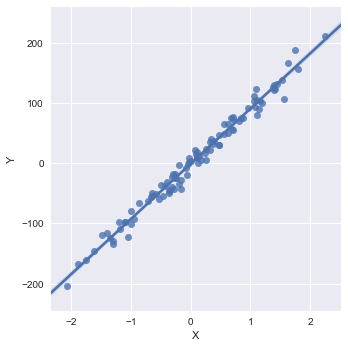

In [40]:
from sklearn.datasets import make_regression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, coef = True)

df = pd.DataFrame(data = {'X':x_train.ravel(), 'Y':y_train.ravel()})

sns.lmplot(x='X', y='Y', data=df, fit_reg=True)
plt.show()

x_torch = torch.FloatTensor(x_train)
y_torch = torch.FloatTensor(y_train)
y_torch = y_torch.view(y_torch.size()[0], 1)

## 2.1 Build Models with **torch.nn**

* **nn** = NeuralNet package
* Main PyTorch's module for playing with NNets
* Modules 
 * implementations of all neural networks modules
 * models should also subclass **torch.nn.Module**
 * automatic conversions when calling **.cuda()**
 * **forward()** method must be implemented
 * propagation of **.train()** and **.eval()** modes
 * ..

PyTorch has a lot of useful modules in its **nn** library. One of them is linear. As the name suggests, it performs a linear transformation of its input, which is essentially linear regression does. 

PyTorch has a lot of useful modules in its **nn** library. One of them is linear. As the name suggests, it performs a linear transformation of its input, which is essentially linear regression does. 

### Simple model: LinearRegressor

In [41]:
class LinearRegressor(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressor, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)  
        
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor(1, 1)

To train a linear regression, we will need to add the right loss function from the same **nn** library. For linear regression we will use **MSELoss()**, mean squared error loss function.

We will also need to use optimization function (SGD), and run a backpropagation similar to our previous toy example. Essentially, we repeating the steps from the **train()** function we defined above. The reason we can't use this function directly is that we implemented it for classification, not for regression, and as model prediction we use the index of the maximum element of cross-entropy loss. For linear regression we use output of linear layer as a prediction.

In [42]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  


for epoch in range(50):
    data, target = Variable(x_torch), Variable(y_torch)
    output = model(data)
        
    optimizer.zero_grad()
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
        
predicted = model(Variable(x_torch)).data.numpy()

We can now print the original data and linear regression that we fit with PyTorch.

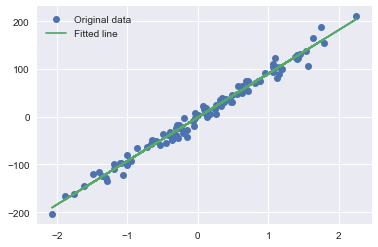

In [43]:
plt.plot(x_train, y_train, 'o', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## 2.2 Manage your Data with **torch.utils.data**


- **torch.utils.data.Dataset** Abstract Class
 - subclasses must implement **\__len__(self)** and **\__getitem__(self, idx)** functions
- **torch.utils.data.DataLoader** Dataset iterator
 - iterates Dataset's items and stack them into tensors
- **torch.utils.data.Sampler** Dataset index sampler
 - generates **idx** for each **\__getitem__** call

To move forward with more complex models, let's download MNIST dataset to your 'datasets' folder and test some initial pre-processing that's available in PyTorch. PyTorch has dataloaders and handlers for various datasets. Once downloaded, you can use them any time. You can also wrap your data in PyTorch tensors and create your own data loader class.

Batch size is a term used in machine learning and refers to the number of training examples utilised in one iteration. The batch size can be one of three options:
-  batch mode: where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent
-  mini-batch mode: where the batch size is greater than one but less than the total dataset size. Usually, a number that can be divided into the total dataset size.
-  stochastic mode: where the batch size is equal to one. Therefore the gradient and the neural network parameters are updated after each sample.


## 2.2.1 **torch.utils.data.Dataset**

In [44]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from torch.utils import data

class RegressionDataset(data.Dataset):
    def __init__(self, n_samples=100, n_fearues=1, noise=10, coef=True):
        super(RegressionDataset, self).__init__()
        self.x_train, self.y_train, W_target = make_regression(
            n_samples=n_samples, 
            n_features=n_fearues, 
            noise=noise, 
            coef=coef)

    def __len__(self):
        return len(self.x_train)

    def __getitem(self, idx):
        return self.x_train[idx], self.y_train[idx]
   

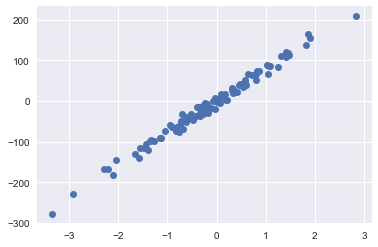

In [45]:
regression_dataset = RegressionDataset()
plt.plot(regression_dataset.x_train, regression_dataset.y_train, 'o', label='Original data')

## 2.2.2 **torch.utils.data.Sampler**

- Base Class for all Samplers
- subclasses must implement **\__len__** and **\__iter__** methods
- provides a way to iterate over dataset elements

## 2.2.2 **torch.utils.data.Sampler**
Several basic implementations are provided by pytorch:
- SequentialSampler
- RandomSampler
- SubsetRandomSampler
- etc.

Its subclasses must implement an **\__iter__** method, providing a way to iterate over indexes of dataset elements, and a __len__ method that returns the lenght of the returned iterators.

## 2.2.3 **torch.utils.data.DataLoader**

- Combines a dataset and a sampler
- provides single- or multi-process iterators
- by default (and if **sampler=None**) makes uses of a **SequentialSampler** or a **RandomSampler** (depending on the **shuffle** parameter value)

## 2.3 Torch.optim

- implements various optimization algorithms
- **SGD**, **Adam**, etc
- updates the model's parameters by calling its **.step()** method
- permits LR management through **torch.optim.lr_scheduler** classes

### 2.3.1 Torch.optim eaxmple, **SGD**

In [46]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


### 2.3.1 Torch.optim.lr_scheduler eaxmple, StepLR

In [47]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=200, gamma=0.1)

- we increase the step value by calling its **step()** method
- when it reach **step_size** calls, **optimizer.lr *= gamma** gets executed and **step_size** gets reinizialized

## 2.4 Torch.autograd

- provides classes and funcitons for automatic differetiation
- requires minimal changes to the existing code
- only need to declare Tensors for which the gradient should be computed (with **requires_grad=True** keyword)

## 2.5 Back to numpy with **.numpy()** interface

- We can always get back to numpy's ndarrays
- **.numpy()** if on a tensor
- **.data.numpy()** if on a variable
- **[SPOILER]** not for long...

## 3. Some Real World (CV) application

### What Does Orobix Do?
Among other things:
- Medical Imaging
  - Organs segmentation
  - Disease Classification
- Industrial Analysis
  - Prototypical Learning
  - VaGans
- Gaming / Robot control
  - Reinforcement learning

Organs segmentation
    Schermata 2018-04-09 alle 16.00.31
    
    
Disease Classification
    Schermata 2018-04-09 alle 15.59.28


Prototypical Learning
    substitution for T-Sne (we let the model learns the samples embeddings in its latent space)
    ![img from paper](http://github.com/orobix/Prototypical-Networks-for-Few-shot-Learning-PyTorch/blob/master/doc/imgs/proto-1.png)
    
We used TSNE before and now this method to let people understand what the model is doing and why a certain sample undergoes a certain classification

VAGAN (reference to vagan code)
Visual Feature Attribution with Wasserstein GANs
[img][reference]

Reinforcement Learning to teach agents to think
[img/vid/vid link]

### 4. Training with PyTorch. Basics

- Basics
- Linear Regression
- Logistinc Regression

### 4. Training with PyTorch. Intermediate

- torchvision package
- pretrained model's predictions
- transfer learning
- fine tuning
- CharRNN


**Acknowledgements.** 

# Thank You !